# MA943 - Numerical Methods

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [1]:
Pkg.add("Plots")
Pkg.update()

INFO: Nothing to be done
INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove



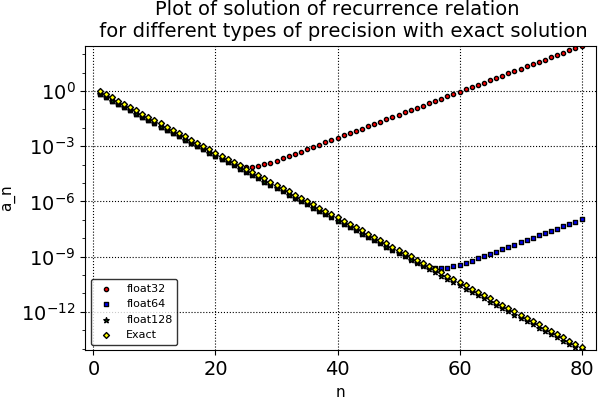

In [21]:
using Plots
pyplot()
include("recurse32.jl")
include("recurse64.jl")
include("recurse128.jl")
n=80
A = zeros(n,1)
B = zeros(n,1)
C = zeros(n,1)
D = zeros(n,1)
for i=1:n
    A[i,1] = recurse32(i)
end
x = linspace(1,n,n)
scatter(x,A,yscale = :log10, label="float32",color="red", markershape=:auto, markersize=3)
xlabel!("n")
ylabel!("a_n")
title!("Plot of solution of recurrence relation \n for different types of precision with exact solution")
#hold(true)

for j=1:n
    B[j,1] = recurse64(j)
end

scatter!(x,B,yscale=:log10,label="float64",color="blue", markershape=:auto, markersize=3)

for k=1:n
    C[k,1] = recurse128(k)
end

scatter!(x,C,yscale=:log10,label="float128",color="green",markershape=:auto, markersize=4)

for l=1:n
    D[l,1] = (2/3)^(l-1)
end

scatter!(x,D,yscale=:log10,label="Exact",color="yellow",markershape=:auto, markersize=3)

As you can see, the solution only matches the exact solution (at least up to $n=80$) is when we are using 128 bit precision.

$\textbf{Part 3: }$
We have the relation $a_{n+1} = 2a_n - \frac{8}{9}a_{n-1}$. The corresponding auxilliary equation for this recurrence relation is $\lambda^2-2\lambda+\frac{8}{9}=0$, which gives us the solutions $\lambda = \frac{4}{3}, \frac{2}{3}$. Thus, our recurrence relation will have a solution of the form \begin{equation}
a_n = A\left(\frac{4}{3}\right)^n + B\left(\frac{2}{3}\right)^n.
\end{equation}

$\textbf{Part 4: }$ \begin{gather}
a_1 = \frac{4}{3}A + \frac{2}{3}B = 1 \\
a_2 = \frac{16}{9}A + \frac{4}{9}B = \frac{2}{3}
\end{gather}
Then solving these, we get $A=0$ and $B=\frac{3}{2}$. This gives us the following as the solution to our recurrence relation: \begin{equation}
a_n = \left(\frac{2}{3}\right)^{n-1}
\end{equation}

$\textbf{Part 5: }$ We will now consider initial conditions $a_1 = 1, \, a_2 = \frac{2}{3}+\varepsilon.$ Then \begin{gather}
16A+4B=3(2+3\varepsilon)\\
8A+4B=6.
\end{gather} SOlving these, we get $A = \frac{9\varepsilon}{8}$, and $B = \frac{3}{2}-\frac{9}{4}\varepsilon$. Then our solution is given by
\begin{equation}
a_n = \frac{9}{8}\varepsilon\left(\frac{4}{3}\right)^n + \left(\frac{3}{2}-\frac{9}{4}\varepsilon\right)\left(\frac{2}{3}\right)^n
\end{equation}
Now the term $\left(\frac{4}{3}\right)^n$ has a non-zero coefficient. As $\frac{4}{3}>1$, as $n$ increases, this term will grow exponentially, essentially becoming the dominating term. Thus, the small perturbation $\varepsilon$ will change the long term behaviour of the solution.

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The included recursive function merges them to return an array of length n+m whose elements are sorted in ascending order.



The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [23]:
###Part 1: Verify mergeseort(A,B) works as expected.
include("mergepresorted.jl")
A1 = vec([1 2 3 4])
B1 = vec([5 6 7])
print(mergepresorted(A1,B1))

[1,2,3,4,5,6,7]

This seems to be working as expected. 

In [24]:
include("mergeSort.jl")

mergeSort (generic function with 1 method)

In [28]:
A = rand(1:2^14,2^14)
mergeSort(A)

16384-element Array{Int64,1}:
     3
     4
     5
     6
     6
     6
     7
     7
     7
     8
     8
     9
     9
     ⋮
 16376
 16376
 16377
 16378
 16379
 16380
 16381
 16381
 16382
 16383
 16383
 16383

This seems to be working as expected.

$\textbf{Part 3: }$ Deriving the complexity recursive relation.

We now want to determine the complexity of the merge sort algorithm. Let F(n) denote the time taken to run the mergesort algorithm on a vector of length n.

In the merge sort algorithm, we recursively look at two vectors each of half the size of the previous one, and also apply the mergepresorted algorithm which has complexity $\sim \mathcal{O}(n)$.

Thus, the $F(n)$ is equal to two lots of $F\left(\frac{n}{2}\right)$, and the time taken to merge them together ($n$).
So $F(n) = 2F\left(\frac{n}{2}\right) + n$.

$\textbf{Part 4: }$ Converting to a linear recurrence relation

To solve this, we first need to convert it into a linear recurrence relation. We will do this by first making the substitution $n=2^p$. Let $b_p = F(2^p)$. Then $F(2^p) = 2F(2^{p-1}) + 2^p$. Thus, we can write our recurrence relation as \begin{equation}
b_p = 2b_{p-1} + 2^p.
\end{equation}
We also need to find our new initial condition. $b_0 = F(2^0) = F(1) = 1$. So the relation we want to solve is \begin{equation}
b_p = 2b_{p-1} + 2^p, \quad b_0=1
\end{equation}

$\textbf{Part 5: }$ Solving the linear homogneeous reucrrence relation
The homogeneous relation we want to solve is \beign{equation}
b_p = 2b_{p-1}, \quad b_0=1.
\end{equation}
Clearly, this has solution $b_p = A'2^p$. We can verify that this satisfies the relation:
\begin{gather}
b_p = A'2^p = 2A'\cdot 2^{p-1} = 2b_{p-1} \\
\end{gather}

$\textbf{Part 6: }$ Solving the inhomogeneous equation
We now want to find a particular solution to the inhomogeneous equation. Usually, we would just consider solutions of the form $A2^p$. However, as this is contained in our solution to the homogeneous problem, we need to consider a solution of the form \begin{equation}
b_p=(A+Bp)2^p+C
\end{equation}
We will substitute this in to determine the coefficients that satisfy our particular problem.
\begin{gather}
b_p = 2b_{p-1}+2^p \\
(A+Bp)2^p+C = 2((A+B(p-1))2^{p-1}+C)+2^p\\
2A2^{p-1}+2Bp2^{p-1}+C=2A2^{p-1}+2Bp2^{p-1}-B2^p+2C+2^p\\
\Rightarrow C=0, \, B=1
\end{gather}
So we have  \begin{gather}
b_p = (A+p)2^p,\\
b_0 = A = 1.
\end{gather}
Thus, our solution to this inhomogeneous recursion problem is
\begin{equation}
b_p = (p+1)2^p
\end{equation}

$\textbf{Part 7: }$ Solving the original recurrence relation

We can now use $b_p = F(n)$, where $n=2^p$ to see that \begin{equation}
F(n) = \left(\frac{\log(n)}{\log(2)}+1\right)\left(2^{\log(n)}\right)^{\frac{1}{\log(2)}} = \left(\frac{\log(n)}{\log(2)}+1\right)\left(n^{\log(2)}\right)^{\frac{1}{\log(2)}} = n\left(\frac{\log(n)}{\log(2)}+1\right)
\end{equation}
This gives us That $F(n) = \mathcal{O}(n\log(n))$


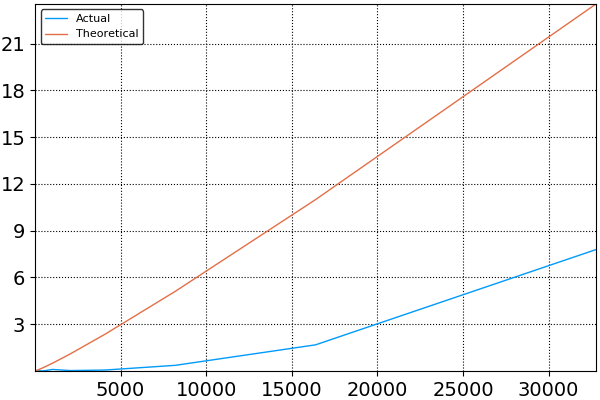

In [31]:
#Part 8: Comparing theoretical and actual results

#Here I will time how long the mergesort algorithm takes to sort lists of random numbers of size 2^k for k ∈ {1,...,15}
t = zeros(15,1)
for i=1:15
    A = rand(1:100,2^i)
    ~,t[i],~,~,~=@timed(mergeSort(A))
end
i=1:15
#Plotting actual time taken
plot(2.^i,t,label="Actual")
plot!(2.^i, t[7]*(2.^i.*log10.(2.^i)),label="Theoretical") #Plotting n against nlog(n)